In [1]:
import numpy as np
import networkx as nx
# import tensorflow as tf
import math

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# from tensorflow.keras import Sequential, Model
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Embedding
from matplotlib.lines import Line2D
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# matplotlib.rcParams['text.usetex'] = True

In [2]:
def read_results_txt_file(filename, n_a, n_b, n_c):
        #c_a = 'red'
        #c_b = 'blue'
        c_a = '1'
        c_b = '0'
        c_c = '2'
        #n_a = np.sum([1 if v['color'] == c_a else 0 for _, v in self.G.nodes.items()])
        #n_b = np.sum([1 if v['color'] == c_b else 0 for _, v in self.G.nodes.items()])

        with open(filename, 'r') as f:
            inf_a, inf_b, inf_c = [], [], []
            for line in f:
                s = line.split()

                assert set([s[1], s[3], s[5]]) == set(['0','1','2'])
                
                for i in [1,3,5]:
                    if s[i] == c_a:
                        inf_a.append(float(s[i+1]))
                    elif s[i] == c_b:
                        inf_b.append(float(s[i+1]))
                    elif s[i] == c_c:
                        inf_c.append(float(s[i+1]))
                    else:
                        raise Exception('wrong format')

        inf_a, inf_b, inf_c = np.array(inf_a), np.array(inf_b), np.array(inf_c)
        total_fraction = 100 * (inf_a + inf_b + inf_c) / (n_a + n_b + n_c)
        frac_a = 100 * inf_a / n_a
        frac_b = 100 * inf_b / n_b
        frac_c = 100 * inf_c / n_c
        
#         tmp_1 = [(frac_a - frac_b).reshape([-1,1]), (frac_a - frac_c).reshape([-1,1]), (frac_b - frac_c).reshape([-1,1])]
#         tmp_2 = np.abs(np.concatenate( tmp_1, axis=1))
#         max_diff_fraction = np.max(tmp_2, axis=1)
        tmp_2 = np.concatenate( [frac_a.reshape([-1,1]), frac_b.reshape([-1,1]), frac_c.reshape([-1,1])], axis=1)
        var_fraction = np.var(tmp_2, axis=1)


        return np.concatenate([np.array(total_fraction).reshape([-1,1]),
                np.array(frac_a).reshape([-1,1]),
                np.array(frac_b).reshape([-1,1]),
                np.array(frac_c).reshape([-1,1]),
#                 np.array(max_diff_fraction).reshape([-1,1])], axis=1)
                np.array(var_fraction).reshape([-1,1])], axis=1)


def read_avg_results_txt_file(filename, n_a, n_b, n_c):
    res = []
    for i in ['_1', '_2', '_3', '_4', '_5']:
        res.append(read_results_txt_file(filename + i + '_results.txt', n_a, n_b, n_c))

    print(res[0].shape, ' ', res[1].shape)
        
    adv = np.mean( np.concatenate([np.expand_dims(a, 2) for a in res], axis = 2), axis = 2)
    return adv    
    

In [3]:
n_a = 2598
n_b = 782
n_c = 180

bndry = '0.5'
exp_ = '2.0'

tmp_filename = '../influence_maximization/results/twitter/sample_4000_connected_subset_0.01'

# filename = tmp_filename + '_emb_random_walk_5_bndry_' + bndry + '_exp_' + exp_ + '_d32_results.txt'
# rice_rw_method = read_results_txt_file(filename, n_a, n_b, n_c)
filename = tmp_filename + '_emb_random_walk_5_bndry_' + bndry + '_exp_' + exp_ + '_d32'
rice_rw_method = read_avg_results_txt_file(filename, n_a, n_b, n_c)

filename = tmp_filename + '_greedy__results.txt'
# filename = '../influence_maximization/results/twitter/sample_4000_connected_0.01_greedy__results.txt'         #################### CORRECT IT
rice_greedy = read_results_txt_file(filename, n_a, n_b, n_c)

# filename = tmp_filename + '_emb_unweighted_d32_results.txt'
# rice_unweighted = read_results_txt_file(filename, n_a, n_b, n_c)
filename = tmp_filename + '_emb_unweighted_d32'
rice_unweighted = read_avg_results_txt_file(filename, n_a, n_b, n_c)

filename = tmp_filename + '_emb_fairwalk_d32'
fairwalk = read_avg_results_txt_file(filename, n_a, n_b, n_c)

###########################


uw = np.array([0.0621, rice_unweighted[-1,0], rice_unweighted[-1,4]])

filename = tmp_filename + '_emb_random_walk_5_bndry_' + '0.3' + '_exp_' + '2.0' + '_d32'
tmp = read_avg_results_txt_file(filename, n_a, n_b, n_c)
alpha0_3_p_2 = np.array([0.0575, tmp[-1,0], tmp[-1,4]])

filename = tmp_filename + '_emb_random_walk_5_bndry_' + '0.5' + '_exp_' + '2.0' + '_d32'
tmp = read_avg_results_txt_file(filename, n_a, n_b, n_c)
alpha0_5_p_2 = np.array([0.0429, tmp[-1,0], tmp[-1,4]])

filename = tmp_filename + '_emb_random_walk_5_bndry_' + '0.7' + '_exp_' + '2.0' + '_d32'
tmp = read_avg_results_txt_file(filename, n_a, n_b, n_c)
alpha0_7_p_2 = np.array([0.0366, tmp[-1,0], tmp[-1,4]])

filename = tmp_filename + '_emb_randomembedding_d32'
tmp = read_avg_results_txt_file(filename, n_a, n_b, n_c)
rnd = np.array([0.0062, tmp[-1,0], tmp[-1,4]])

(40, 5)   (40, 5)
(40, 5)   (40, 5)
(40, 5)   (40, 5)
(40, 5)   (40, 5)
(40, 5)   (40, 5)
(40, 5)   (40, 5)
(40, 5)   (40, 5)


In [4]:
n_seeds = np.arange(2,41,2)

red_ = '#fab3ac'
blue_ = '#29a5e3'
cyan_ = '#d2f0f7'
green_ = '#a3f77e'
gray_ = '#dbdbdb'
purple_ = '#BF55EC'
yellow_ = '#F7CA18'

In [5]:
def get_real_plots(figtype, square, fontsize, labelsize, imagesize, line_width, ylim=None, legend_size=20):

    fig, ax = plt.subplots()

    
    ind = n_seeds - 1
    
    if figtype == 'total':
        ax.plot(n_seeds, rice_unweighted[ind, 0], color='red', lw=line_width, label='DeepWalk')
    elif figtype == 'frac':
        ax.plot(n_seeds, rice_unweighted[ind, 1], color='red', lw=line_width, linestyle='dashed')
        ax.plot(n_seeds, rice_unweighted[ind, 2],  color='red', lw=line_width, linestyle='dotted')
        ax.plot(n_seeds, rice_unweighted[ind, 3],  color='red', lw=line_width, linestyle='-.')
        
    if figtype == 'total':
        ax.plot(n_seeds, fairwalk[ind, 0], color='green', lw=line_width, label='DeepWalk')
    elif figtype == 'frac':
        ax.plot(n_seeds, fairwalk[ind, 1], color='green', lw=line_width, linestyle='dashed')
        ax.plot(n_seeds, fairwalk[ind, 2],  color='green', lw=line_width, linestyle='dotted')
        ax.plot(n_seeds, fairwalk[ind, 3],  color='green', lw=line_width, linestyle='-.')
    
#     if figtype == 'total':
#         ax.plot(n_seeds, rice_greedy[ind, 0], color='cyan', lw=line_width, label='Greedy')
#     elif figtype == 'frac':
#         ax.plot(n_seeds, rice_greedy[ind, 1], color='cyan', lw=line_width, linestyle='dashed')
#         ax.plot(n_seeds, rice_greedy[ind, 2],  color='cyan', lw=line_width, linestyle='dotted')
#         ax.plot(n_seeds, rice_greedy[ind, 3],  color='cyan', lw=line_width, linestyle='-.')
        
    if figtype == 'total':
        ax.plot(n_seeds, rice_rw_method[ind, 0], color='blue', lw=line_width, label='SocialWalk')
    elif figtype == 'frac':
        ax.plot(n_seeds, rice_rw_method[ind, 1], color='blue', lw=line_width, linestyle='dashed')
        ax.plot(n_seeds, rice_rw_method[ind, 2],  color='blue', lw=line_width, linestyle='dotted')
        ax.plot(n_seeds, rice_rw_method[ind, 3],  color='blue', lw=line_width, linestyle='-.')
    
#     custom_lines = [Line2D([0], [0], color='red', lw=3),
#                 Line2D([0], [0], color='green', lw=3),
#                 Line2D([0], [0], color='blue', lw=3), 
#                 Line2D([0], [0], color='cyan', lw=3)]
#     legend1 = plt.legend(custom_lines, ['Greedy', 'Tsang et al.', 'Emb+K-med', 'Preproc+Emb+K-med'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
    if figtype == 'frac':
        custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
                Line2D([0], [0], linestyle='dotted', lw=3),
                Line2D([0], [0], linestyle='-.', lw=3)]
        legend2 = plt.legend(custom_lines2, ['Group A', 'Group B', 'Group C'], loc='upper left')
        plt.gca().add_artist(legend2)
    
    if ylim:
        ax.set_ylim([0, ylim])
    
    plt.yticks([0, 0.5, 1, 1.5], ['0.0%', '0.5%', '1.0%', '1.5%'])
    
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
    plt.legend(loc='upper left', prop={'size': legend_size})
    
    plt.xlabel('Number of Seeds', fontsize = labelsize)
    if figtype == 'total':
        #plt.ylabel('Fraction Influenced', fontsize = labelsize)
        plt.ylabel('Total Influence', fontsize = labelsize)
    else:
        plt.ylabel('Group Influence', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.xticks(fontsize=labelsize)
    plt.yticks(fontsize=labelsize)
#     plt.yticks([5,10,15,20], ['5%', '10%', '15%', '20%'], fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    added_s = ''
    if not square:
        added_s = '1'
    
    if figtype == 'total':
        fig.savefig('fig/influence_maximization_twitter/sample_4000_connected_subset-total' + added_s + '.pdf',bbox_inches='tight')
    elif figtype == 'frac':
        fig.savefig('fig/influence_maximization_twitter/sample_4000_connected_subset-fractions' + added_s + '.pdf',bbox_inches='tight')
    
    
#%%

# def get_diff_plot(real, square, fontsize, labelsize, imagesize, line_width, ylim=None):
def get_var_plot(real, square, fontsize, labelsize, imagesize, line_width, ylim=None, legend_size=20):
        
    fig, ax = plt.subplots()
    
    ind = n_seeds - 1
    ax.plot(n_seeds, rice_unweighted[ind, 4], linestyle='solid', color='red', lw=line_width, label='DeepWalk')
    ax.plot(n_seeds, fairwalk[ind, 4], linestyle='solid', color='green', lw=line_width, label='FairWalk')
#     ax.plot(n_seeds, rice_greedy[ind, 4], linestyle='solid', color='cyan', lw=line_width, label='Greedy')
    ax.plot(n_seeds, rice_rw_method[ind, 4], linestyle='solid', color='blue', lw=line_width, label='SocialWalk')
    

#     custom_lines = [Line2D([0], [0], color='red', lw=3),
#                 Line2D([0], [0], color='green', lw=3),
#                 Line2D([0], [0], color='blue', lw=3), 
#                 Line2D([0], [0], color='cyan', lw=3)]
#     legend1 = plt.legend(custom_lines, ['Greedy', 'Tsang et al.', 'Emb+K-med', 'Preproc+Emb+K-med'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
    if ylim:
        ax.set_ylim([0, ylim])
    
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
    plt.yticks([0.00, 0.05, 0.1, 0.15, 0.2], ['0.00', '0.05', '0.10', '0.15', '0.20'])
    
    plt.legend(loc='upper left', prop={'size': legend_size})
    
    plt.xlabel('Number of Seeds', fontsize = labelsize)
#     plt.ylabel('Max Diff in Fraction Influenced', fontsize = labelsize)
    plt.ylabel('Discrepancy', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.xticks(fontsize=labelsize)
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    added_s = ''
    if not square:
        added_s = '1'
    
    fig.savefig('fig/influence_maximization_twitter/sample_4000_connected_subset-diff' + added_s + '.pdf',bbox_inches='tight')


In [6]:
def get_bar_plot_all(real, bar_width, square, fontsize, labelsize, imagesize, ylim = None):
    
    
    methods = ['Gr', 'Ts', 'EmKm', 'PrEmKm']
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    labels = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
    
#     xg= [xx-bar_width/2 , xx, xx+bar_width/2]
#     xp = [xx - bar_width/2, 3, 3 + bar_width/2]
#     xf = [xx - bar_width/2, 5, 5 + bar_width/2]
#     xfm = [xx - bar_width/2, 7, 7 + bar_width/2]
    
    
    
    
    xg = [1 - bar_width, 1, 1 + bar_width, 1 + 2 * bar_width]
#     xt = [3 - bar_width, 3, 3 + bar_width, 3 + 2 * bar_width]
    xe = [4 - bar_width, 4, 4 + bar_width, 4 + 2 * bar_width]
    xp = [7 - bar_width, 7, 7 + bar_width, 7 + 2 * bar_width]
    
    

    greedy = rice_greedy[-1, :4] # [0.16, 0.084,	0.18]    
    #Tsang = # [0.159, 0.045, 0.191]           
    EmKm = rice_unweighted[-1, :4] # [0.161,	0.136, 0.168]           
    PrEmKm = rice_rw_method[-1, :4] # [0.175,	0.11, 0.194]       
    
    fig, ax = plt.subplots()
    
    ax.bar(xg[0], greedy[0], bar_width, color = red_, edgecolor='black')
    #ax.bar(xt[0], Tsang[0], bar_width, color = cyan_, edgecolor='black')
    ax.bar(xe[0], EmKm[0], bar_width, color = green_, edgecolor='black')
    ax.bar(xp[0], PrEmKm[0], bar_width, color = blue_, edgecolor='black')
    
    ax.bar(xg[1], greedy[1], bar_width, color = red_, hatch='//', edgecolor='black')
    #ax.bar(xt[1], Tsang[1], bar_width, color = cyan_, hatch='//', edgecolor='black')
    ax.bar(xe[1], EmKm[1], bar_width, color = green_, hatch='//', edgecolor='black')
    ax.bar(xp[1], PrEmKm[1], bar_width, color = blue_, hatch='//', edgecolor='black')
        
    ax.bar(xg[2], greedy[2], bar_width, color = red_, hatch='\\\\', edgecolor='black')
    #ax.bar(xt[2], Tsang[2], bar_width, color = cyan_, hatch='\\\\', edgecolor='black')
    ax.bar(xe[2], EmKm[2], bar_width, color = green_, hatch='\\\\', edgecolor='black')
    ax.bar(xp[2], PrEmKm[2], bar_width, color = blue_, hatch='\\\\', edgecolor='black')
    
    ax.bar(xg[3], greedy[3], bar_width, color = red_, hatch='--', edgecolor='black')
    #ax.bar(xt[3], Tsang[3], bar_width, color = cyan_, hatch='--', edgecolor='black')
    ax.bar(xe[3], EmKm[3], bar_width, color = green_, hatch='--', edgecolor='black')
    ax.bar(xp[3], PrEmKm[3], bar_width, color = blue_, hatch='--', edgecolor='black')
    
    ax.bar(xg[0], 0, bar_width, color = gray_, label='Total', edgecolor='black')
    ax.bar(xg[1], 0, bar_width, color = gray_, hatch='//', label='Group A', edgecolor='black')
    ax.bar(xg[2], 0, bar_width, color = gray_, hatch='\\\\', label='Group B', edgecolor='black')
    ax.bar(xg[3], 0, bar_width, color = gray_, hatch='--', label='Group C', edgecolor='black')

    plt.legend(loc='upper right')
    
#     custom_lines = [Line2D([0], [0], color='red', lw=3),
#                     Line2D([0], [0], color='green', lw=3),
#                     Line2D([0], [0], color='blue', lw=3), 
#                     Line2D([0], [0], color='cyan', lw=3)]
#     legend1 = plt.legend(custom_lines, ['Greedy', 'Tsang et al.', 'Emb+K-med', 'Preproc+Emb+K-med'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
#                ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
#     custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
#                     Line2D([0], [0], linestyle='dotted', lw=3)]
#     legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'])
#     plt.gca().add_artist(legend2)
    
    if ylim:
        ax.set_ylim([0, ylim])
     
    
    
    ax.set_xticklabels(labels)
#     plt.xticks([0.6,1,1.4,2.6,3,3.4,4.6,5,5.4,6.6,7,7.4], ['Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B'], rotation=60, horizontalalignment='right', fontsize=12)
#     ax.set_axisbelow(True)
#     ax.yaxis.grid(color='gray', linestyle='dashed')
    
    plt.xlabel('Methods', fontsize = labelsize)
    plt.ylabel('Fraction Influenced', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    added_s = ''
    if not square:
        added_s = '1'
    
    fig.savefig('fig/influence_maximization_twitter/sample_4000_connected_subset-bar' + added_s + '.pdf',bbox_inches='tight')
    

In [7]:
def get_bar_plot(real, bar_width, square, fontsize, labelsize, imagesize, ylim = None, legend_size=20):
    
    
#     methods = ['Gr', 'Ts', 'EmKm', 'PrEmKm']
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    labels = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
    
#     xg= [xx-bar_width/2 , xx, xx+bar_width/2]
#     xp = [xx - bar_width/2, 3, 3 + bar_width/2]
#     xf = [xx - bar_width/2, 5, 5 + bar_width/2]
#     xfm = [xx - bar_width/2, 7, 7 + bar_width/2]
    
    
    
    xg = [2 - bar_width, 2]
    xu = [4 - bar_width, 4]
    xf = [6 - bar_width, 6]
#     xa = [5 - bar_width/2, 5 + bar_width/2]
    xp = [8 - bar_width, 8]
    
    

    greedy = rice_greedy[-1, :5] # [0.16, 0.084,	0.18]    
#     ad = adv[-1,:5]
    EmKm = rice_unweighted[-1, :5] # [0.161,	0.136, 0.168]
    FW = fairwalk[-1,:5]
    PrEmKm = rice_rw_method[-1, :5] # [0.175,	0.11, 0.194]       
    
    print(EmKm)
    print(FW)
    print(PrEmKm)
    
    fig, ax = plt.subplots()
    
    ax.bar(xg[0], greedy[0], bar_width, color = purple_, edgecolor='black')
    ax.bar(xu[0], EmKm[0], bar_width, color = purple_, edgecolor='black', label='Total Influence Percentage')
    ax.bar(xf[0], FW[0], bar_width, color = purple_, edgecolor='black')
#     ax.bar(xa[0], ad[0], bar_width, color = purple_, edgecolor='black')
    ax.bar(xp[0], PrEmKm[0], bar_width, color = purple_, edgecolor='black')
    
    ax.bar(xg[1], greedy[4], bar_width, color = yellow_, edgecolor='black')
    ax.bar(xu[1], EmKm[4], bar_width, color = yellow_, edgecolor='black', label='Disparity')
    ax.bar(xf[1], FW[4], bar_width, color = yellow_, edgecolor='black')
#     ax.bar(xa[1], ad[4], bar_width, color = yellow_, edgecolor='black')
    ax.bar(xp[1], PrEmKm[4], bar_width, color = yellow_, edgecolor='black')
    
#     ax.bar(xg[1], greedy[1], bar_width, color = red_, hatch='//', edgecolor='black')
#     ax.bar(xa[1], ad[1], bar_width, color = cyan_, hatch='//', edgecolor='black')
#     ax.bar(xe[1], EmKm[1], bar_width, color = green_, hatch='//', edgecolor='black')
#     ax.bar(xp[1], PrEmKm[1], bar_width, color = blue_, hatch='//', edgecolor='black')
        
#     ax.bar(xg[2], greedy[2], bar_width, color = red_, hatch='\\\\', edgecolor='black')
#     ax.bar(xa[2], ad[2], bar_width, color = cyan_, hatch='\\\\', edgecolor='black')
#     ax.bar(xe[2], EmKm[2], bar_width, color = green_, hatch='\\\\', edgecolor='black')
#     ax.bar(xp[2], PrEmKm[2], bar_width, color = blue_, hatch='\\\\', edgecolor='black')
    
#     ax.bar(xg[0], 0, bar_width, color = gray_, label='Total', edgecolor='black')
#     ax.bar(xg[1], 0, bar_width, color = gray_, hatch='//', label='Group A', edgecolor='black')
#     ax.bar(xg[2], 0, bar_width, color = gray_, hatch='\\\\', label='Group B', edgecolor='black')

#     plt.legend(loc='upper right')
    
#     custom_lines = [Line2D([0], [0], color='red', lw=3),
#                     Line2D([0], [0], color='green', lw=3),
#                     Line2D([0], [0], color='blue', lw=3), 
#                     Line2D([0], [0], color='cyan', lw=3)]
#     legend1 = plt.legend(custom_lines, ['Greedy', 'Tsang et al.', 'Emb+K-med', 'Preproc+Emb+K-med'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
#                ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
#     custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
#                     Line2D([0], [0], linestyle='dotted', lw=3)]
#     legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'])
#     plt.gca().add_artist(legend2)
    
    if ylim:
        ax.set_ylim([0, ylim])
    
    plt.legend(loc='upper right', prop={'size': legend_size})
    
    ax.set_xticklabels(labels)
    plt.xticks([2,4,6,8], ['Greedy', 'DeepWalk', 'FairWalk', 'SocialWalk'], fontsize=legend_size)
#     plt.xticks([0.6,1,1.4,2.6,3,3.4,4.6,5,5.4,6.6,7,7.4], ['Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B'], rotation=60, horizontalalignment='right', fontsize=12)
#     ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
#     plt.xlabel('Methods', fontsize = labelsize)
#     plt.ylabel('Fraction Influenced', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    added_s = ''
    if not square:
        added_s = '1'

    fig.savefig('fig/influence_maximization_twitter/sample_4000_connected_subset-bar' + added_s + '.pdf',bbox_inches='tight')

In [8]:
def get_mmd_plot(real, bar_width, fontsize, labelsize, imagesize, ylim, legend_size):
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    #labels = ['A-A', 'B-B', 'A-B', 'Total']
    
    xu = [2 - bar_width, 2, 2 + bar_width]
    x0_3 = [6 - bar_width, 6, 6 + bar_width]
    x0_5 = [10 - bar_width, 10, 10 + bar_width]
    x0_7 = [14 - bar_width, 14, 14 + bar_width]
    xr = [18 - bar_width, 18, 18 + bar_width]
    
    
    fig, ax = plt.subplots()
    
    ax.bar(xu[0], 30 * uw[0], bar_width, color = green_, edgecolor='black', label='MMD ✕ 30')
    ax.bar(x0_3[0], 30 * alpha0_3_p_2[0], bar_width, color = green_, edgecolor='black')
    ax.bar(x0_5[0], 30 * alpha0_5_p_2[0], bar_width, color = green_, edgecolor='black')
    ax.bar(x0_7[0], 30 * alpha0_7_p_2[0], bar_width, color = green_, edgecolor='black')
    ax.bar(xr[0], 30 * rnd[0], bar_width, color = green_, edgecolor='black')

    ax.bar(xu[1], uw[1], bar_width, color = purple_, edgecolor='black', label='Total Accuracy')
    ax.bar(x0_3[1], alpha0_3_p_2[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(x0_5[1], alpha0_5_p_2[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(x0_7[1], alpha0_7_p_2[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(xr[1], rnd[1], bar_width, color = purple_, edgecolor='black')

    ax.bar(xu[2], uw[2], bar_width, color = yellow_, edgecolor='black', label='Disparity')
    ax.bar(x0_3[2], alpha0_3_p_2[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(x0_5[2], alpha0_5_p_2[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(x0_7[2], alpha0_7_p_2[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(xr[2], rnd[2], bar_width, color = yellow_, edgecolor='black')

    plt.legend(loc='upper right', prop={'size': legend_size}) #'upper left')
    
    ax.set_ylim(ylim)
     
    plt.xticks([2, 6, 10, 14, 18], ['DeepWalk', 'SocialWalk\nα=0.3, p=2', 'SocialWalk\nα=0.5, p=2', 'SocialWalk\nα=0.7, p=2', 'Random\nEmbedding'], fontsize = 18)
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
#     plt.xlabel('Methods', fontsize = labelsize)
#     plt.ylabel('Accuracy', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    fig.savefig('fig/influence_maximization_twitter/sample_4000_connected_subset-mmd' + '.pdf',bbox_inches='tight')

In [9]:
def get_legend():
    params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
    plt.rcParams.update(params)
    fig, ax = plt.subplots(figsize=(6,.015))
    custom_lines = [Line2D([0], [0], color=red_, lw=3),
            Line2D([0], [0], color='green', lw=3), 
            Line2D([0], [0], color='blue', lw=3)]
    legend1 = plt.legend(custom_lines, ['Greedy', 'Deepwalk + K-medoids', 'Reweighting + Deepwalk + K-medoids'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0.)
    plt.gca().add_artist(legend1)
    plt.axis('off')
    fig.savefig('fig/influence_maximization_twitter/sample_4000_connected_subset-legend.pdf', bbox_inches='tight')

No handles with labels found to put in legend.


[1.36966292 1.2878368  1.67232737 1.23577778 0.08951973]
[1.4041236  1.24865281 1.76787724 2.06777778 0.14819448]
[1.43480899 1.35083911 1.6628133  1.65622222 0.07885169]


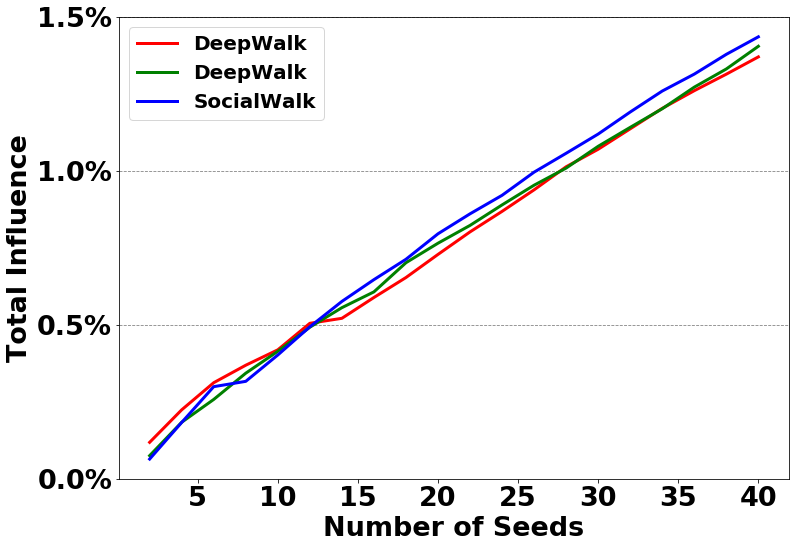

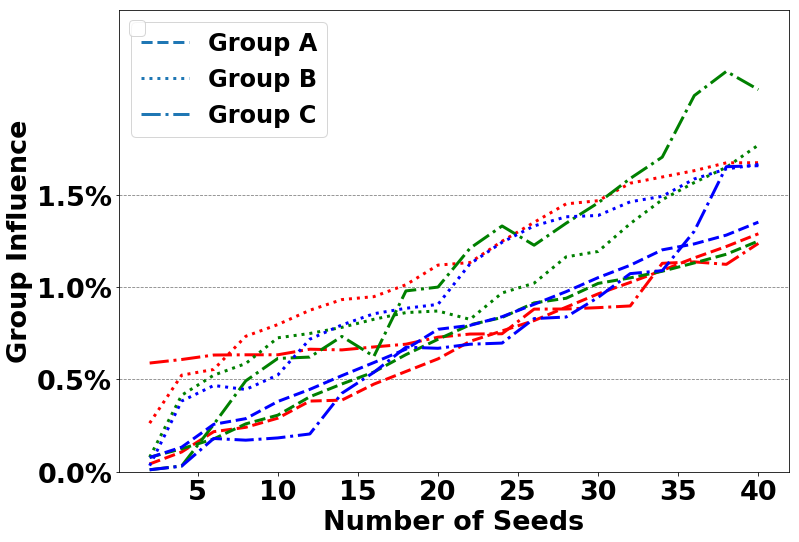

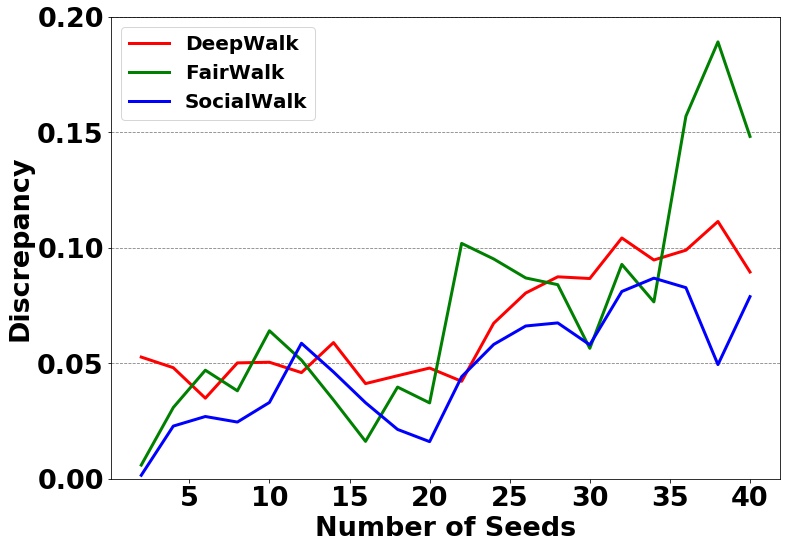

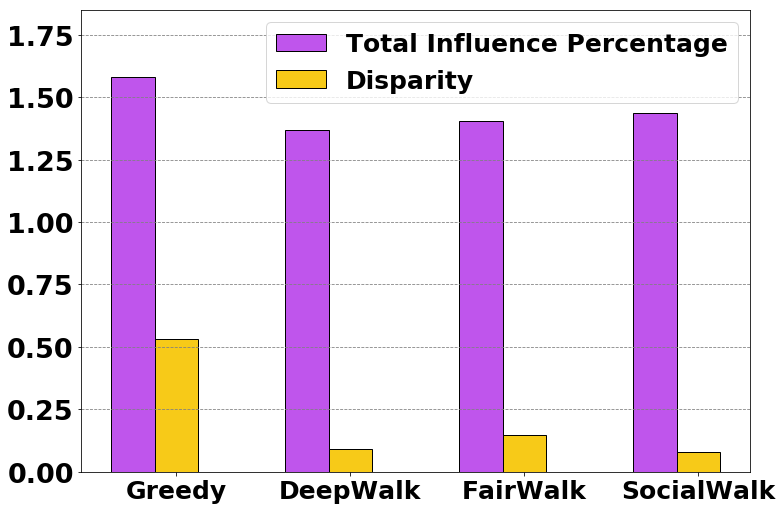

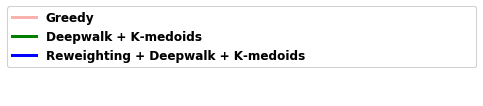

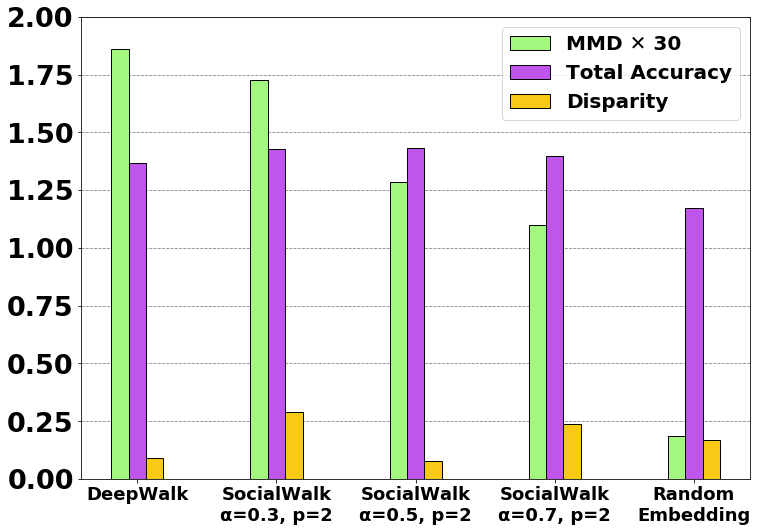

In [10]:
# Plotting the square plots
# Real Plots

label_size = 27
font_size = 24
image_size = (12, 8.5)
line_width = 3
square = True
bar_width = 0.5

get_real_plots(figtype='total', square=square, fontsize=font_size, labelsize=label_size, imagesize=image_size, line_width=line_width, ylim=1.5, legend_size = 20)
get_real_plots(figtype='frac', square=square, fontsize=font_size, labelsize=label_size, imagesize=image_size, line_width=line_width, ylim=2.5, legend_size = 20)
# get_diff_plot(real=True, square=square, fontsize=font_size, labelsize=label_size, imagesize=image_size, line_width=line_width, ylim=0.16)
get_var_plot(real=True, square=square, fontsize=font_size, labelsize=label_size, imagesize=image_size, line_width=line_width, ylim=0.2, legend_size=20)
get_bar_plot(real=True, bar_width=bar_width, square=square, fontsize=font_size, labelsize=label_size, imagesize=image_size, ylim=1.85, legend_size=25)
get_legend()

image_size = (12, 8.5)
y_lim = [0, 2]
legend_size = 20
get_mmd_plot(real=True, bar_width=bar_width, fontsize=font_size, labelsize=label_size, imagesize=image_size, ylim=y_lim, legend_size=legend_size)

In [11]:
rice_greedy[1,:]

array([0.17769663, 0.11454965, 0.4140665 , 0.06222222, 0.02402699])